# Pymaceuticals Inc.
 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, how="outer")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Checking the number of mice.
len(mouse_study_df["Mouse ID"].unique())

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
mouse_study_df[duplicates]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989']
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [12]:
# Checking the number of mice in the clean DataFrame
len(mouse_study_df["Mouse ID"].unique())

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

column_names = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std Dev', 'Tumor Volume Std Err']
drug_group = mouse_study_df.groupby('Drug Regimen')
mean_tumor_vol = drug_group['Tumor Volume (mm3)'].mean()
median_tumor_vol = drug_group['Tumor Volume (mm3)'].median()
variance_tumor_vol = drug_group['Tumor Volume (mm3)'].var()
sd_tumor_vol = drug_group['Tumor Volume (mm3)'].std()
sem_tumor_vol = drug_group['Tumor Volume (mm3)'].sem()

drug_summary = pd.concat([mean_tumor_vol, median_tumor_vol, variance_tumor_vol, sd_tumor_vol, sem_tumor_vol], axis=1)
drug_summary.set_axis(column_names, axis=1)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observable Cases'>

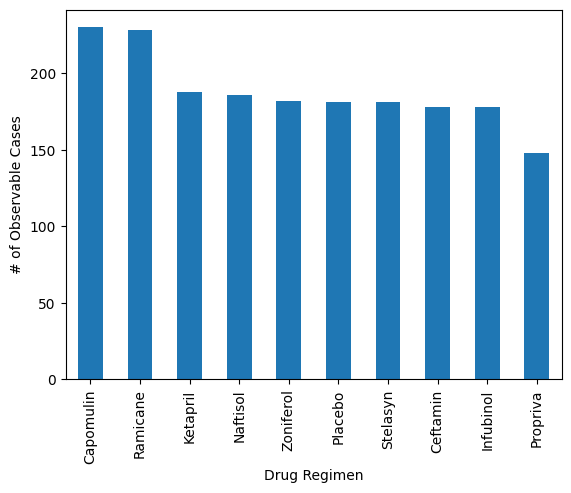

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen

drug_timepoints_df = drug_group['Mouse ID'].count()
drug_timepoints_df = drug_timepoints_df.sort_values(ascending=False)
drug_timepoints_df.plot(kind="bar", ylabel="# of Observable Cases")

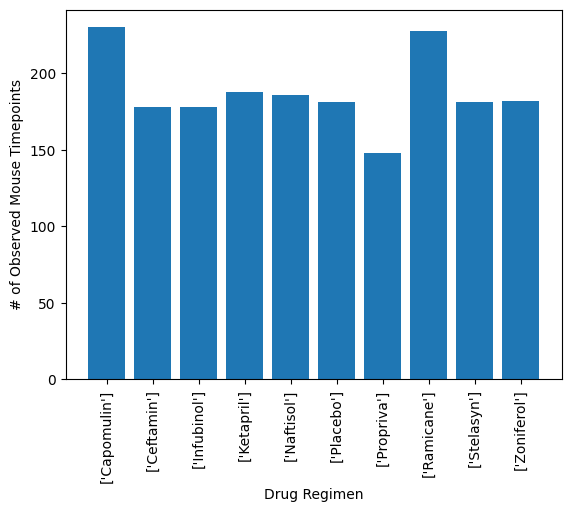

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen

x_axis = np.arange(len(drug_group))
y_axis = drug_group["Mouse ID"].count()
tick_locations = [value for value in x_axis]
drug_names = drug_group['Drug Regimen'].unique()
plt.bar(x_axis, y_axis, align="center")
plt.xticks(tick_locations, drug_names, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

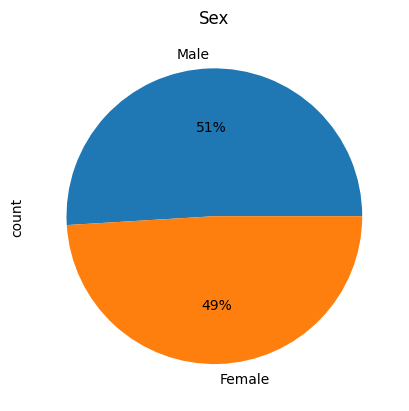

In [17]:
# Generate a pie plot showing the distribution of female versus male mice

mouse_gender = mouse_study_df["Sex"].value_counts()
mouse_gender.plot(kind="pie", autopct="%1.0f%%", title="Sex")
plt.show()

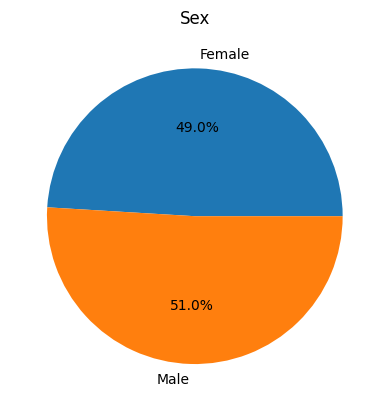

In [18]:
# Generate a pie plot showing the distribution of female versus male mice

mouse_gender = mouse_study_df["Sex"].value_counts()
mouse_gender = mouse_gender.sort_values()
gender_labels = mouse_study_df["Sex"].unique()
plt.pie(mouse_gender, labels=gender_labels, autopct="%1.1f%%")
plt.title("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_timepoint = mouse_study_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
final_tumor_size = pd.merge(mouse_study_df, final_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_size.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {"Capomulin":[], "Ramicane":[], "Infubinol":[], "Ceftamin":[]}

# Calculate the IQR and quantitatively determine if there are any potential outliers
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final_tumor_size.iterrows():
    if row["Drug Regimen"] in treatments:
        tumor_vol_data[row["Drug Regimen"]].append(row["Tumor Volume (mm3)"])



In [21]:
# Determine outliers using upper and lower bounds

cap_outliers = []
capomulin = pd.Series(tumor_vol_data["Capomulin"])
lowerq = capomulin.quantile(.25)
upperq = capomulin.quantile(.75)
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
for x in capomulin:
    if ((x > upper_bound) | (x < lower_bound)).any():
        cap_outliers.append(x)

print(f"Capomulin's potential outliers:{cap_outliers}")

Capomulin's potential outliers:[]


In [22]:
ram_outliers = []
ramicane = pd.Series(tumor_vol_data["Ramicane"])
lowerq = ramicane.quantile(.25)
upperq = ramicane.quantile(.75)
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
for x in ramicane:
    if ((x > upper_bound) | (x < lower_bound)).any():
        ram_outliers.append(x)

print(f"Ramicane's potential outliers:{ram_outliers}")

Ramicane's potential outliers:[]


In [23]:
inf_outliers = []
infubinol = pd.Series(tumor_vol_data["Infubinol"])
lowerq = infubinol.quantile(.25)
upperq = infubinol.quantile(.75)
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
for x in infubinol:
    if ((x > upper_bound) | (x < lower_bound)).any():
        inf_outliers.append(x)

print(f"Infubinol's potential outliers:{inf_outliers}")

Infubinol's potential outliers:[36.3213458]


In [24]:
cef_outliers = []
ceftamin = pd.Series(tumor_vol_data["Ceftamin"])
lowerq = ceftamin.quantile(.25)
upperq = ceftamin.quantile(.75)
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
for x in ceftamin:
    if ((x > upper_bound) | (x < lower_bound)).any():
        cef_outliers.append(x)

print(f"Ceftamin's potential outliers:{cef_outliers}")

Ceftamin's potential outliers:[]


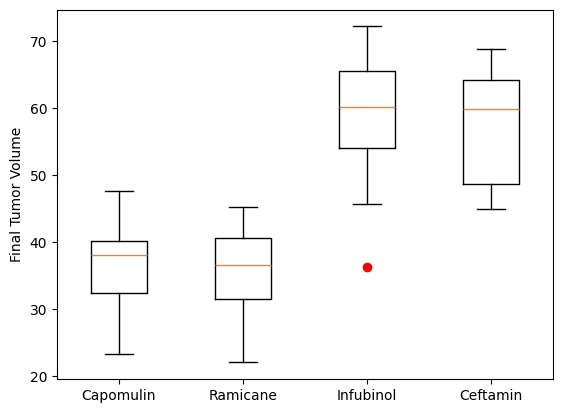

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot([capomulin, ramicane, infubinol, ceftamin], sym="red")
ax1.set_xticks([1, 2, 3, 4], treatments)
plt.show()


## Line and Scatter Plots

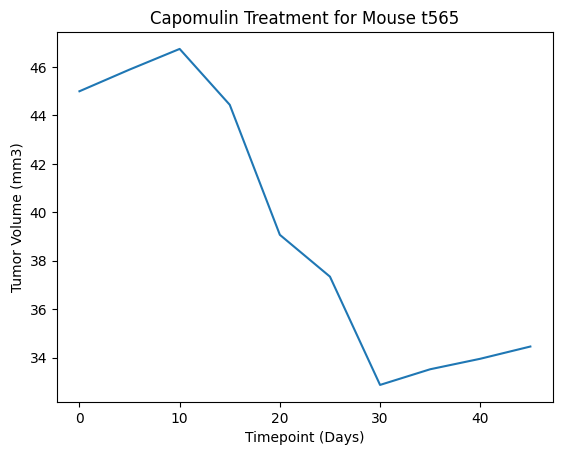

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
ID_index_df = mouse_study_df.set_index("Mouse ID")
t565_df = ID_index_df.loc["t565"]

plt.plot(t565_df["Timepoint"], t565_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse t565")
plt.show()


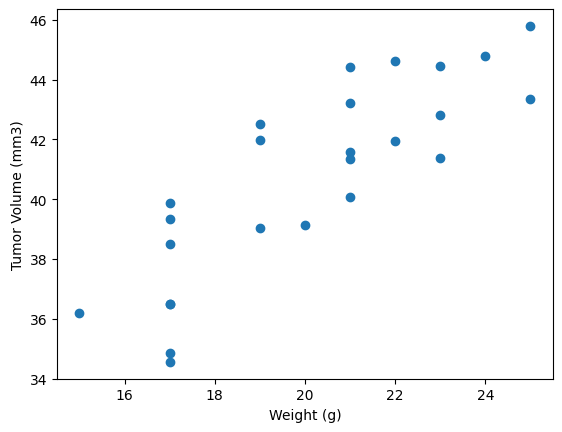

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = mouse_study_df.loc[mouse_study_df[mouse_study_df["Drug Regimen"]=="Capomulin"].index]
capomulin_df = capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})
x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


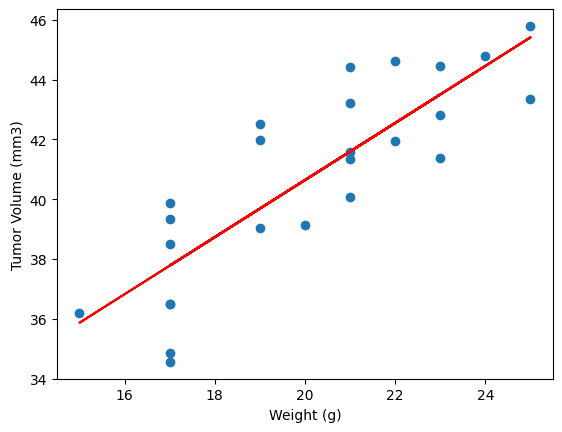

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(cap_slope, cap_intercept, cap_rvalue, cap_pvalue, cap_stderr) = st.linregress(x_values, y_values)
regress_values = x_values * cap_slope + cap_intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {cap_rvalue}")
